## Graph Visualization Final Project for CS-UY 3943

Data is from the [OpenFlights](https://github.com/jpatokal/openflights/tree/master/data) dataset. I loaded airport, airline, and route data from the dataset. Note that the data goes up to 2014 only.

In [2]:
%pip install pandas
%pip install matplotlib
%pip install graphistry

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plot
from IPython.display import display
import graphistry

Load data from the dataset into pandas dataframes and drop unnecessary columns.

In [4]:
# Load data from openflights/ folder
DIR = 'openflights/'

# Load airlines.dat data into a pandas DataFrame
columns = ["Airline ID", "Name", "Alias", "IATA", "ICAO", "Callsign", "Country", "Active"]
airlines_df = pd.read_csv(DIR + 'airlines.dat', delimiter=',', names=columns)

# Drop Alias, IATA, Callsign columns
airlines_df.drop(["Alias", "IATA", "Callsign"], axis=1, inplace=True)

# Load airports.dat data into a pandas DataFrame
columns = ["Airport ID", "Name", "City", "Country", "IATA", "ICAO", "Latitude", "Longitude", "Altitude", "Timezone", "DST", "Tz database time zone", "Type", "Source"]
airports_df = pd.read_csv(DIR + 'airports.dat', delimiter=',', names=columns)

# Drop ICAO, Altitude, Timezone, DST, Tz database time zone, Type, Source columns
airports_df.drop(["ICAO", "Altitude", "Timezone", "DST", "Tz database time zone", "Type", "Source"], axis=1, inplace=True)

# Load routes.dat data into a pandas DataFrame
columns = ["Airline", "Airline ID", "Source airport", "Source airport ID", "Destination airport", "Destination airport ID", "Codeshare", "Stops", "Equipment"]
routes_df = pd.read_csv(DIR + 'routes.dat', delimiter=',', names=columns)

# Drop Codeshare and Equipment columns
routes_df.drop(["Codeshare", "Equipment"], axis=1, inplace=True)

# Load countries.dat data into a pandas DataFrame
columns = ["Name", "ISO", "DAFIF"]
countries_df = pd.read_csv(DIR + 'countries.dat', delimiter=',', names=columns)

# Drop DAFIF column
countries_df.drop(["DAFIF"], axis=1, inplace=True)

# Load country_mappings.dat data into a pandas DataFrame
columns = ["Continent", "Code", "Country", "ISO2", "ISO3", "Number"]
country_mappings_df = pd.read_csv(DIR + 'country_mappings.dat', delimiter=',', comment='#', names=columns)

# Drop ISO3, Number columns
country_mappings_df.drop(["ISO3", "Number"], axis=1, inplace=True)

# Define continent colors
continent_colors = {
    'Africa': 'green',
    'Antarctica': 'black',
    'Asia': 'blue',
    'Europe': 'yellow',
    'North America': 'red',
    'Oceania': 'aqua',
    'South America': 'orange'
}

In [5]:
# Print out the first 5 rows of each DataFrame
display(airlines_df.head())
display(airports_df.head())
display(routes_df.head())
display(countries_df.head())
display(country_mappings_df.head())

,Airline ID,Name,ICAO,Country,Active
0,-1,Unknown,NaN,\N,Y
1,1,Private flight,NaN,NaN,Y
2,2,135 Airways,GNL,United States,N
3,3,1Time Airline,RNX,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,WYT,United Kingdom,N


,Airport ID,Name,City,Country,IATA,Latitude,Longitude
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,-6.081690,145.391998
1,2,Madang Airport,Madang,Papua New Guinea,MAG,-5.207080,145.789001
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,-5.826790,144.296005
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,-6.569803,146.725977
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,-9.443380,147.220001


,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Stops
0,2B,410,AER,2965,KZN,2990,0
1,2B,410,ASF,2966,KZN,2990,0
2,2B,410,ASF,2966,MRV,2962,0
3,2B,410,CEK,2968,KZN,2990,0
4,2B,410,CEK,2968,OVB,4078,0


,Name,ISO
0,"Bonaire, Saint Eustatius and Saba",BQ
1,Aruba,AW
2,Antigua and Barbuda,AG
3,United Arab Emirates,AE
4,Afghanistan,AF


,Continent,Code,Country,ISO2
0,Asia,AS,"Afghanistan, Islamic Republic of",AF
1,Europe,EU,"Albania, Republic of",AL
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ
4,Oceania,OC,American Samoa,AS


Data Exploration

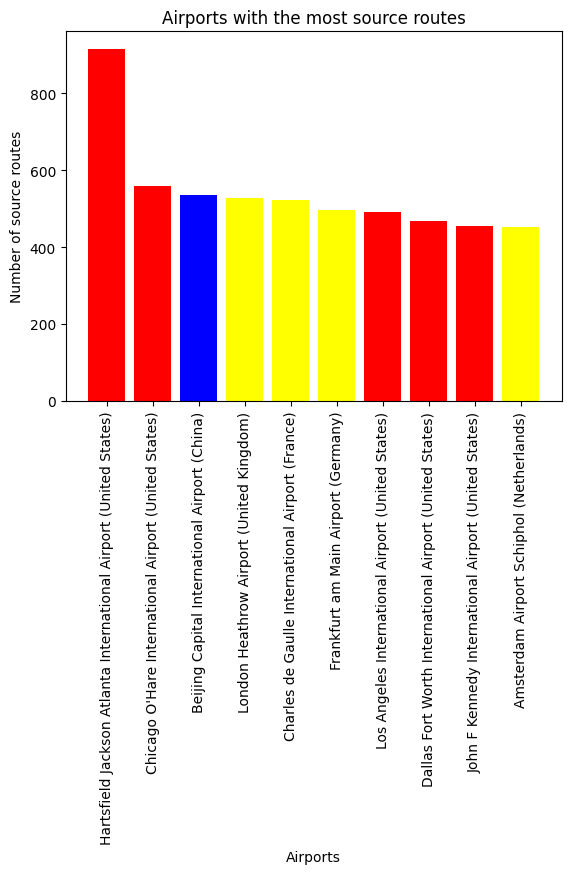

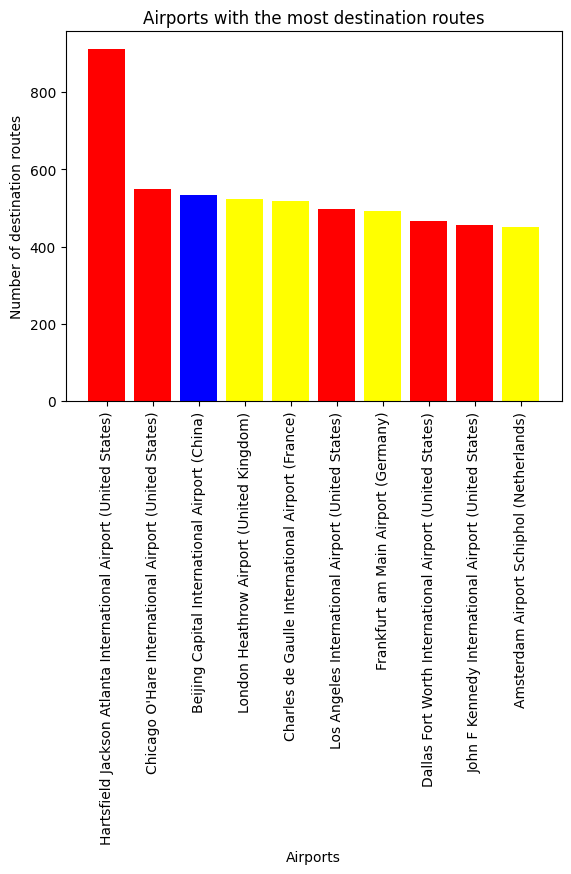

In [6]:
# Bar graph of the airports with the most routes
def display_top_airports(mode):
    routes = routes_df["Source airport" if mode == "source" else "Destination airport"].value_counts().head(10)

    # Get the names and continent color of the airports
    names = []
    colors = []
    for airport in routes.index:
        airport_entry = airports_df[airports_df["IATA"] == airport]
        country = airport_entry["Country"].values[0]
        names.append(airport_entry["Name"].values[0] + " (" + country + ")")
        country_iso = countries_df[countries_df["Name"] == country]["ISO"].values[0]
        
        continent = country_mappings_df[country_mappings_df["ISO2"] == country_iso]["Continent"].values[0]
        colors.append(continent_colors[continent])

    plot.bar(names, routes, color=colors)
    plot.xlabel("Airports")
    plot.ylabel("Number of {} routes".format("source" if mode == "source" else "destination"))
    plot.title("Airports with the most {} routes".format("source" if mode == "source" else "destination"))

    # Rotate the x-axis labels
    plot.xticks(rotation=90)
    plot.show()

display_top_airports("source")
display_top_airports("destination")

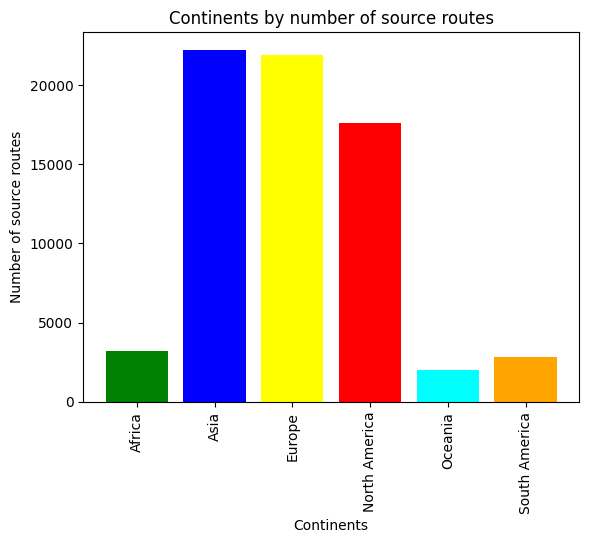

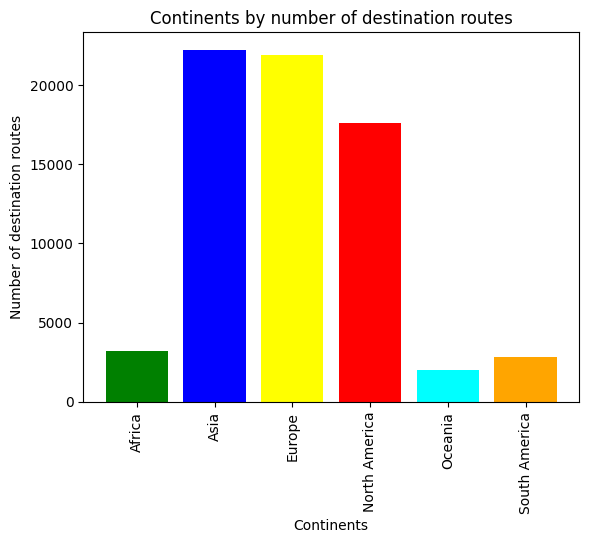

In [7]:
# Bar graph of the continents ordered by decreasing number of routes
def display_continent_routes(mode):
    # Aggregate routes by airport
    routes = routes_df["Source airport" if mode == "source" else "Destination airport"].value_counts()

    # Add country to route
    routes = routes.reset_index()
    routes.columns = ["IATA", "Count"]
    routes = pd.merge(routes, airports_df[["IATA", "Country"]], on="IATA")
    routes.drop(["IATA"], axis=1, inplace=True)
   
    # Aggregate routes by country
    routes = routes.groupby("Country").sum()

    # Add ISO2 to route
    routes = routes.reset_index()
    routes.columns = ["Country", "Count"]
    routes = pd.merge(routes, countries_df[["Name", "ISO"]], left_on="Country", right_on="Name")
    routes.drop(["Name", "Country"], axis=1, inplace=True)

    # Add continent to route
    routes = routes.reset_index()
    routes = pd.merge(routes, country_mappings_df[["ISO2", "Continent"]], left_on="ISO", right_on="ISO2")

    # Aggregate routes by continent
    routes = routes.groupby("Continent").sum()

    plot.bar(routes.index, routes["Count"], color=[continent_colors[continent] for continent in routes.index])
    plot.xlabel("Continents")
    plot.ylabel("Number of {} routes".format("source" if mode == "source" else "destination"))
    plot.title("Continents by number of {} routes".format("source" if mode == "source" else "destination"))

    # Rotate the x-axis labels
    plot.xticks(rotation=90)
    plot.show()

display_continent_routes("source")
display_continent_routes("destination")

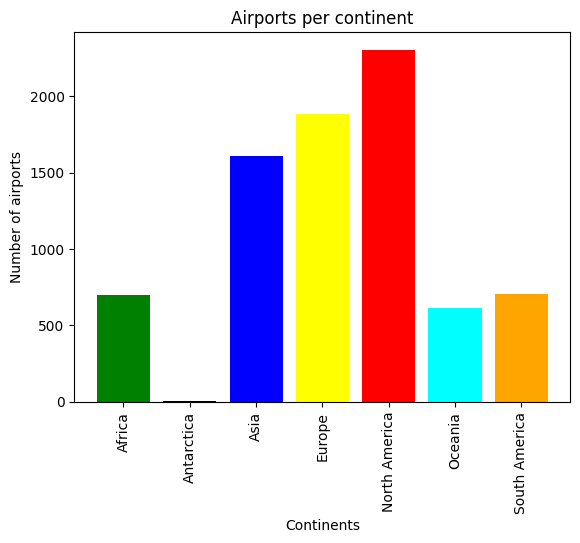

In [8]:
# Graph number of airports per continent
def display_continent_airports():
    airports = airports_df["Country"].value_counts()

    # Add ISO2 to airport
    airports = airports.reset_index()
    airports.columns = ["Country", "Count"]
    airports = pd.merge(airports, countries_df[["Name", "ISO"]], left_on="Country", right_on="Name")
    airports.drop(["Name", "Country"], axis=1, inplace=True)

    # Add continent to airport
    airports = airports.reset_index()
    airports = pd.merge(airports, country_mappings_df[["ISO2", "Continent"]], left_on="ISO", right_on="ISO2")

    # Aggregate airports by continent
    airports = airports.groupby("Continent").sum()

    plot.bar(airports.index, airports["Count"], color=[continent_colors[continent] for continent in airports.index])
    plot.xlabel("Continents")
    plot.ylabel("Number of airports")
    plot.title("Airports per continent")

    # Rotate the x-axis labels
    plot.xticks(rotation=90)
    plot.show()

display_continent_airports()

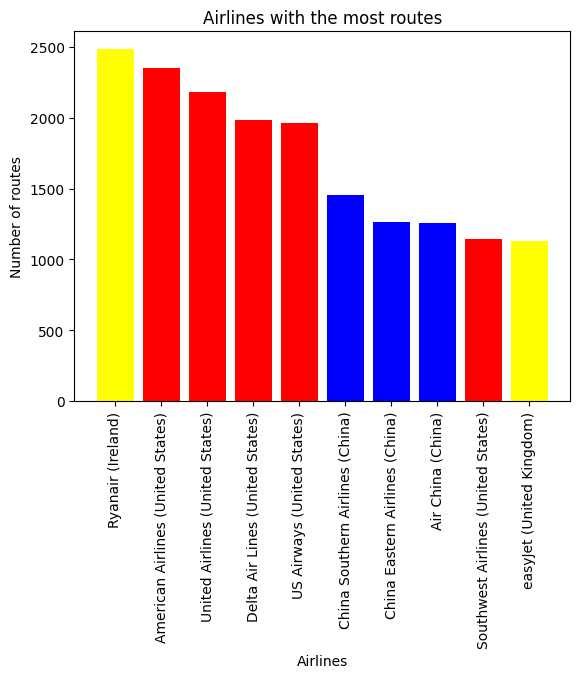

In [9]:
# Graph airlines with the most routes
def display_top_airlines():
    routes = routes_df["Airline ID"].value_counts().head(10)

    # Get the names and colors of the airlines
    names = []
    colors = []
    for airline in routes.index:
        # Note: Airline ID is an integer in routes_df but a string in airlines_df
        airline_entry = airlines_df[airlines_df["Airline ID"] == int(airline)]
        country = airline_entry["Country"].values[0]
        names.append(airline_entry["Name"].values[0] + " (" + country + ")")
        country_iso = countries_df[countries_df["Name"] == country]["ISO"].values[0]
        
        continent = country_mappings_df[country_mappings_df["ISO2"] == country_iso]["Continent"].values[0]
        colors.append(continent_colors[continent])

    plot.bar(names, routes, color=colors)
    plot.xlabel("Airlines")
    plot.ylabel("Number of routes")
    plot.title("Airlines with the most routes")

    # Rotate the x-axis labels
    plot.xticks(rotation=90)
    plot.show()

display_top_airlines()

Graph Visualization

In [10]:
# Register Graphistry API key
graphistry.register(api=3, protocol="https", server="hub.graphistry.com", personal_key_id="DYW1RBBG2W", personal_key_secret="4RLDXFP8HC8Q39SO")

In [11]:
# Drop airports with no routes
edge_nodes = pd.concat([routes_df['Source airport'], routes_df['Destination airport']]).unique()
filtered_airports_df = airports_df[airports_df['IATA'].isin(edge_nodes)]

# Drop routes that don't map to airports
filtered_routes_df = routes_df[
    routes_df['Source airport'].isin(filtered_airports_df['IATA']) &
    routes_df['Destination airport'].isin(filtered_airports_df['IATA'])
]

# Create annot_airports_df with country and continent
annot_airports_df = pd.merge(filtered_airports_df, countries_df, left_on='Country', right_on='Name')
annot_airports_df = pd.merge(annot_airports_df, country_mappings_df, left_on='ISO', right_on='ISO2')

# Add color using continent_colors
annot_airports_df['Color'] = annot_airports_df['Continent'].apply(lambda x: continent_colors[x])

# Drop Name_y, Country_y, ISO3, Number
annot_airports_df.drop(['Name_y', 'Country_y', 'ISO2'], axis=1, inplace=True)

# Rename Name_x, Country_x, ISO2
annot_airports_df.rename(columns={'Name_x': 'Name', 'Country_x': 'Country', 'ISO2': 'ISO'}, inplace=True)

display(annot_airports_df.head())

,Airport ID,Name,City,Country,IATA,Latitude,Longitude,ISO,Continent,Code,Color
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,-6.081690,145.391998,PG,Oceania,OC,aqua
1,2,Madang Airport,Madang,Papua New Guinea,MAG,-5.207080,145.789001,PG,Oceania,OC,aqua
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,-5.826790,144.296005,PG,Oceania,OC,aqua
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,-6.569803,146.725977,PG,Oceania,OC,aqua
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,-9.443380,147.220001,PG,Oceania,OC,aqua


In [12]:
# Default Settings - No weights/colors
graph = graphistry.bind(source='Source airport', destination='Destination airport')
graph = graph.nodes(annot_airports_df, 'IATA')
graph = graph.edges(filtered_routes_df, direct=True)

url = graph.plot(render=False)
url


'https://hub.graphistry.com/graph/graph.html?dataset=9ec769d5c0864b13baad8aa9132c7ae5&type=arrow&viztoken=37c366ef-293b-4deb-9296-df6095cc0b2c&usertag=31ee4f8d-pygraphistry-0.33.7&splashAfter=1714082077&info=true'

In [13]:
# Default Settings with colors for each continent
graph = graphistry.bind(source='Source airport', destination='Destination airport')
graph = graph.nodes(annot_airports_df, 'IATA').encode_point_color('Color', categorical_mapping={
    'green': 'green', 'black': 'black', 'blue': 'blue', 'yellow': 'yellow', 'red': 'red', 'aqua': 'aqua', 'orange': 'orange'}, default_mapping='black')
graph = graph.edges(filtered_routes_df, direct=True)

url = graph.plot(render=False)
url

'https://hub.graphistry.com/graph/graph.html?dataset=5971870c64cf449298da742b12a78101&type=arrow&viztoken=6cff7742-b98b-4c95-b06c-1757415201ec&usertag=31ee4f8d-pygraphistry-0.33.7&splashAfter=1714082078&info=true'

In [14]:
# Add weights based on distance squared (NOTE: This takes a while to run)
def get_distance_squared(row):
    source = annot_airports_df[annot_airports_df['IATA'] == row['Source airport']]
    destination = annot_airports_df[annot_airports_df['IATA'] == row['Destination airport']]
    if source.empty or destination.empty:
        return 0
    return (source['Latitude'].values[0] - destination['Latitude'].values[0])**2 + (source['Longitude'].values[0] - destination['Longitude'].values[0])**2

filtered_weighted_routes_df = filtered_routes_df.copy()
filtered_weighted_routes_df['Distance Squared'] = filtered_weighted_routes_df.apply(get_distance_squared, axis=1)

In [15]:
# Default Settings with weights set based on latitude and longitude distance squared
graph = graphistry.bind(source='Source airport', destination='Destination airport')
graph = graph.nodes(annot_airports_df, 'IATA').encode_point_color('Color', categorical_mapping={
    'green': 'green', 'black': 'black', 'blue': 'blue', 'yellow': 'yellow', 'red': 'red', 'aqua': 'aqua', 'orange': 'orange'}, default_mapping='black')
graph = graph.edges(filtered_weighted_routes_df, direct=True).bind(edge_weight='Distance Squared')

url = graph.plot(render=False)
url

'https://hub.graphistry.com/graph/graph.html?dataset=345b94ae62cd45c1acb7ba76733dd9e8&type=arrow&viztoken=e96f9568-b8b7-4ff4-af8a-aa23aa65f8e0&usertag=31ee4f8d-pygraphistry-0.33.7&splashAfter=1714082156&info=true'

In [16]:
# Aggregate route data by country
country_routes = filtered_routes_df.copy()

# Merge with annot_airports_df to get source country and continent
country_routes = pd.merge(country_routes, annot_airports_df, left_on='Source airport', right_on='IATA')

# Drop Airport ID, Name, City, IATA, Latitude, Longitude, ISO, Color, Code
country_routes.drop(['Airport ID', 'Name', 'City', 'IATA', 'Latitude', 'Longitude', 'ISO', 'Color', 'Code'], axis=1, inplace=True)
country_routes.rename(columns={'Country': 'Source Country', 'Continent': 'Source Continent'}, inplace=True)

# Merge with annot_airports_df to get destination country and continent
country_routes = pd.merge(country_routes, annot_airports_df, left_on='Destination airport', right_on='IATA')

# Drop Airport ID, Name, City, IATA, Latitude, Longitude, ISO, Color, Code
country_routes.drop(['Airport ID', 'Name', 'City', 'IATA', 'Latitude', 'Longitude', 'ISO', 'Color', 'Code'], axis=1, inplace=True)
country_routes.rename(columns={'Country': 'Destination Country', 'Continent': 'Destination Continent'}, inplace=True)

# Aggregate routes by country
country_routes = country_routes.groupby(['Source Country', 'Source Continent', 'Destination Country', 'Destination Continent']).size().reset_index(name='Count')

display(country_routes.head())

# Drop countries with no routes
edge_nodes = pd.concat([country_routes['Source Country'], country_routes['Destination Country']]).unique()
filtered_countries_df = countries_df[countries_df['Name'].isin(edge_nodes)]

# Add color using continent_colors
filtered_countries_df = pd.merge(filtered_countries_df, country_mappings_df, left_on='ISO', right_on='ISO2')

# Drop Code, ISO2
filtered_countries_df.drop(['Code', 'ISO2'], axis=1, inplace=True)
filtered_countries_df['Color'] = filtered_countries_df['Continent'].apply(lambda x: continent_colors[x])

,Source Country,Source Continent,Destination Country,Destination Continent,Count
0,Afghanistan,Asia,Afghanistan,Asia,14
1,Afghanistan,Asia,Azerbaijan,Asia,1
2,Afghanistan,Asia,Azerbaijan,Europe,1
3,Afghanistan,Asia,India,Asia,14
4,Afghanistan,Asia,Iran,Asia,5


In [17]:
# Graph country routes without color
graph = graphistry.bind(source='Source Country', destination='Destination Country')
graph = graph.nodes(filtered_countries_df, 'Name')
graph = graph.edges(country_routes, direct=True)

url = graph.plot(render=False)
url

'https://hub.graphistry.com/graph/graph.html?dataset=36fbeb1a6523476cb8eae25b60b61728&type=arrow&viztoken=a828567f-c535-4c99-b4dd-a17f3e2f8e83&usertag=31ee4f8d-pygraphistry-0.33.7&splashAfter=1714082157&info=true'

In [18]:
# Graph country routes with color
graph = graphistry.bind(source='Source Country', destination='Destination Country')
graph = graph.nodes(filtered_countries_df, 'Name').encode_point_color('Color', categorical_mapping={
    'green': 'green', 'black': 'black', 'blue': 'blue', 'yellow': 'yellow', 'red': 'red', 'aqua': 'aqua', 'orange': 'orange'}, default_mapping='black')
graph = graph.edges(country_routes, direct=True)

url = graph.plot(render=False)
url

'https://hub.graphistry.com/graph/graph.html?dataset=d29a5a6f9d4f44038583e71820900ee7&type=arrow&viztoken=c8489a6b-fb30-445d-9d61-4be98dea6d78&usertag=31ee4f8d-pygraphistry-0.33.7&splashAfter=1714082158&info=true'

In [19]:
# Aggregate route data by continent
continent_routes = country_routes.copy()
continent_routes = continent_routes.groupby(['Source Continent', 'Destination Continent']).size().reset_index(name='Count')

# Drop continents with no routes
edge_nodes = pd.concat([continent_routes['Source Continent'], continent_routes['Destination Continent']]).unique()

# Drop self loops
continent_routes = continent_routes[continent_routes['Source Continent'] != continent_routes['Destination Continent']]

display(continent_routes)

# Create continent nodes from country_mappings_df
continents = country_mappings_df[['Continent']].drop_duplicates()

,Source Continent,Destination Continent,Count
1,Africa,Asia,125
2,Africa,Europe,159
3,Africa,North America,10
4,Africa,Oceania,2
5,Africa,South America,4
6,Asia,Africa,121
8,Asia,Europe,423
9,Asia,North America,29
10,Asia,Oceania,43
11,Asia,South America,3


In [20]:
# Graph continent routes with color
graph = graphistry.bind(source='Source Continent', destination='Destination Continent')
graph = graph.nodes(continents, 'Continent').encode_point_color('Continent', categorical_mapping=continent_colors, default_mapping='black')
graph = graph.edges(continent_routes, direct=True)

url = graph.plot(render=False)
url

'https://hub.graphistry.com/graph/graph.html?dataset=3c589e802d994c3293bcd2fda08905a8&type=arrow&viztoken=f89b2533-0b58-4943-a776-067f3ae69ede&usertag=31ee4f8d-pygraphistry-0.33.7&splashAfter=1714082159&info=true'

Graph Visualization - Subsets

In [21]:
# Find the top 50 airports with the most routes
top_airports = pd.concat([filtered_routes_df['Source airport'], filtered_routes_df['Destination airport']]).value_counts().head(50).index

# Filter the routes to only include the top 50 airports
filtered_top_routes_df = filtered_routes_df[
    filtered_routes_df['Source airport'].isin(top_airports) &
    filtered_routes_df['Destination airport'].isin(top_airports)
]

# Drop everything but top 50 airports
filtered_top_airports_df = annot_airports_df[annot_airports_df['IATA'].isin(top_airports)]

# Graph with color based on continent
graph = graphistry.bind(source='Source airport', destination='Destination airport')
graph = graph.nodes(filtered_top_airports_df, 'IATA').encode_point_color('Color', categorical_mapping={
    'green': 'green', 'black': 'black', 'blue': 'blue', 'yellow': 'yellow', 'red': 'red', 'aqua': 'aqua', 'orange': 'orange'}, default_mapping='black')
graph = graph.edges(filtered_top_routes_df, direct=True)

url = graph.plot(render=False)
url

'https://hub.graphistry.com/graph/graph.html?dataset=6334a2d8f309428ba71366f18608bf17&type=arrow&viztoken=57b92490-dcec-4dcf-90af-02799ee10be6&usertag=31ee4f8d-pygraphistry-0.33.7&splashAfter=1714082159&info=true'

In [22]:
# Find all routes with multiple stops
multi_stop_routes = filtered_routes_df[filtered_routes_df['Stops'] > 0]

# Drop airports that don't have multiple stops
multi_stop_airports = pd.concat([multi_stop_routes['Source airport'], multi_stop_routes['Destination airport']]).unique()

filtered_multi_stop_routes_df = multi_stop_routes[
    multi_stop_routes['Source airport'].isin(multi_stop_airports) &
    multi_stop_routes['Destination airport'].isin(multi_stop_airports)
]

# Drop everything but multi stop airports
filtered_multi_stop_airports_df = annot_airports_df[annot_airports_df['IATA'].isin(multi_stop_airports)]

# Graph with color based on continent
graph = graphistry.bind(source='Source airport', destination='Destination airport')
graph = graph.nodes(filtered_multi_stop_airports_df, 'IATA').encode_point_color('Color', categorical_mapping={
    'green': 'green', 'black': 'black', 'blue': 'blue', 'yellow': 'yellow', 'red': 'red', 'aqua': 'aqua', 'orange': 'orange'}, default_mapping='black')
graph = graph.edges(filtered_multi_stop_routes_df, direct=True)

url = graph.plot(render=False)
url

'https://hub.graphistry.com/graph/graph.html?dataset=cc5c405075f7447283c9fe71184f99a6&type=arrow&viztoken=d93c89ac-1e62-4feb-bf29-ad2b698c3150&usertag=31ee4f8d-pygraphistry-0.33.7&splashAfter=1714082160&info=true'

In [23]:
# Remove routes that have Source or Destination in Northern Hemisphere
southern_routes = filtered_routes_df[
    filtered_routes_df['Source airport'].isin(annot_airports_df[annot_airports_df['Latitude'] < 0]['IATA']) &
    filtered_routes_df['Destination airport'].isin(annot_airports_df[annot_airports_df['Latitude'] < 0]['IATA'])
]

# Drop airports that don't have routes in southern_routes
southern_airports = pd.concat([southern_routes['Source airport'], southern_routes['Destination airport']]).unique()

# Graph with color based on continent
graph = graphistry.bind(source='Source airport', destination='Destination airport')
graph = graph.nodes(annot_airports_df[annot_airports_df['IATA'].isin(southern_airports)], 'IATA').encode_point_color('Color', categorical_mapping={
    'green': 'green', 'black': 'black', 'blue': 'blue', 'yellow': 'yellow', 'red': 'red', 'aqua': 'aqua', 'orange': 'orange'}, default_mapping='black')
graph = graph.edges(southern_routes, direct=True)

url = graph.plot(render=False)
url

'https://hub.graphistry.com/graph/graph.html?dataset=abb1ed1c962a462faf40588da2a6dd2c&type=arrow&viztoken=6b7ee971-e76f-4dd0-8e3e-6044cd09cbc8&usertag=31ee4f8d-pygraphistry-0.33.7&splashAfter=1714082161&info=true'

In [24]:
# Remove routes that have Source or Destination in Northern Hemisphere
northern_routes = filtered_routes_df[
    filtered_routes_df['Source airport'].isin(annot_airports_df[annot_airports_df['Latitude'] > 0]['IATA']) &
    filtered_routes_df['Destination airport'].isin(annot_airports_df[annot_airports_df['Latitude'] > 0]['IATA'])
]

# Drop airports that don't have routes in southern_routes
northern_airports = pd.concat([northern_routes['Source airport'], northern_routes['Destination airport']]).unique()

# Graph with color based on continent
graph = graphistry.bind(source='Source airport', destination='Destination airport')
graph = graph.nodes(annot_airports_df[annot_airports_df['IATA'].isin(northern_airports)], 'IATA').encode_point_color('Color', categorical_mapping={
    'green': 'green', 'black': 'black', 'blue': 'blue', 'yellow': 'yellow', 'red': 'red', 'aqua': 'aqua', 'orange': 'orange'}, default_mapping='black')
graph = graph.edges(northern_routes, direct=True)

url = graph.plot(render=False)
url

'https://hub.graphistry.com/graph/graph.html?dataset=ad6098f0eccf4494aa0b7bf985fa580b&type=arrow&viztoken=3d25f057-1f8b-4ebd-a340-e14f520eebc8&usertag=31ee4f8d-pygraphistry-0.33.7&splashAfter=1714082162&info=true'

In [25]:
# Drop routes that don't have an American airline
american_airlines = airlines_df[airlines_df['Country'] == 'United States']

# Note: Airline ID is an integer in american airlines, change it to a string
american_airlines['Airline ID'] = american_airlines['Airline ID'].astype(str)

american_routes = filtered_routes_df[
    filtered_routes_df['Airline ID'].isin(american_airlines['Airline ID'])
]

# Drop airports that don't have routes in american_routes
american_airports = pd.concat([american_routes['Source airport'], american_routes['Destination airport']]).unique()

# Graph with color based on continent
graph = graphistry.bind(source='Source airport', destination='Destination airport')
graph = graph.nodes(annot_airports_df[annot_airports_df['IATA'].isin(american_airports)], 'IATA').encode_point_color('Color', categorical_mapping={
    'green': 'green', 'black': 'black', 'blue': 'blue', 'yellow': 'yellow', 'red': 'red', 'aqua': 'aqua', 'orange': 'orange'}, default_mapping='black')
graph = graph.edges(american_routes, direct=True)

url = graph.plot(render=False)
url

/tmp/ipykernel_24977/3953216241.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american_airlines['Airline ID'] = american_airlines['Airline ID'].astype(str)


'https://hub.graphistry.com/graph/graph.html?dataset=ec594f0980df42ea96bd7d80fdfcc7b2&type=arrow&viztoken=1779b05e-b4e5-42aa-bc75-5e7b2fe73f61&usertag=31ee4f8d-pygraphistry-0.33.7&splashAfter=1714082163&info=true'

In [ ]:
n = 15

# Create correlation matrix comparing top n airports using the countries connected
top_n_routes = pd.concat([filtered_routes_df['Source airport'], filtered_routes_df['Destination airport']]).value_counts().head(n).index

# Filter the routes to only include the top 20 airports
filtered_top_n_routes_df = filtered_routes_df[
    filtered_routes_df['Source airport'].isin(top_n_airports) &
    filtered_routes_df['Destination airport'].isin(top_n_airports)
]

# Drop everything but top n airports
filtered_top_20_airports_df = annot_airports_df[annot_airports_df['IATA'].isin(top_n_airports)]

# Create a matrix of the countries connected by the top n airports
# Rows = top n airports, columns = countries
correlation_matrix = pd.DataFrame(index=top_n_airports, columns=annot_airports_df['Country'].unique())

# Fill the matrix with 1 if the airport is connected to the country, 0 otherwise
for airport in top_n_airports:
    connected_countries = filtered_top_n_routes_df[filtered_top_n_routes_df['Source airport'] == airport]['Destination airport']
    for country in correlation_matrix.columns:
        correlation_matrix.at[airport, country] = 1 if country in annot_airports_df[annot_airports_df['IATA'].isin(connected_countries)]['Country'].values else 0

# Swap rows and columns
correlation_matrix = correlation_matrix.transpose()

# Find correlation between the top n airports
correlation_matrix = correlation_matrix.astype(int)
correlation_matrix = correlation_matrix.corr()


display(correlation_matrix)

,ATL,ORD,LHR,PEK,CDG
ATL,1.000000,0.863911,0.661789,1.000000,0.661789
ORD,0.863911,1.000000,0.863911,0.863911,0.863911
LHR,0.661789,0.863911,1.000000,0.661789,0.661789
PEK,1.000000,0.863911,0.661789,1.000000,0.661789
CDG,0.661789,0.863911,0.661789,0.661789,1.000000
